C:\Users\Bartolo\AppData\Local\Temp\ipykernel_32164\60703740.py:20: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  europe = europe.fillna(0)


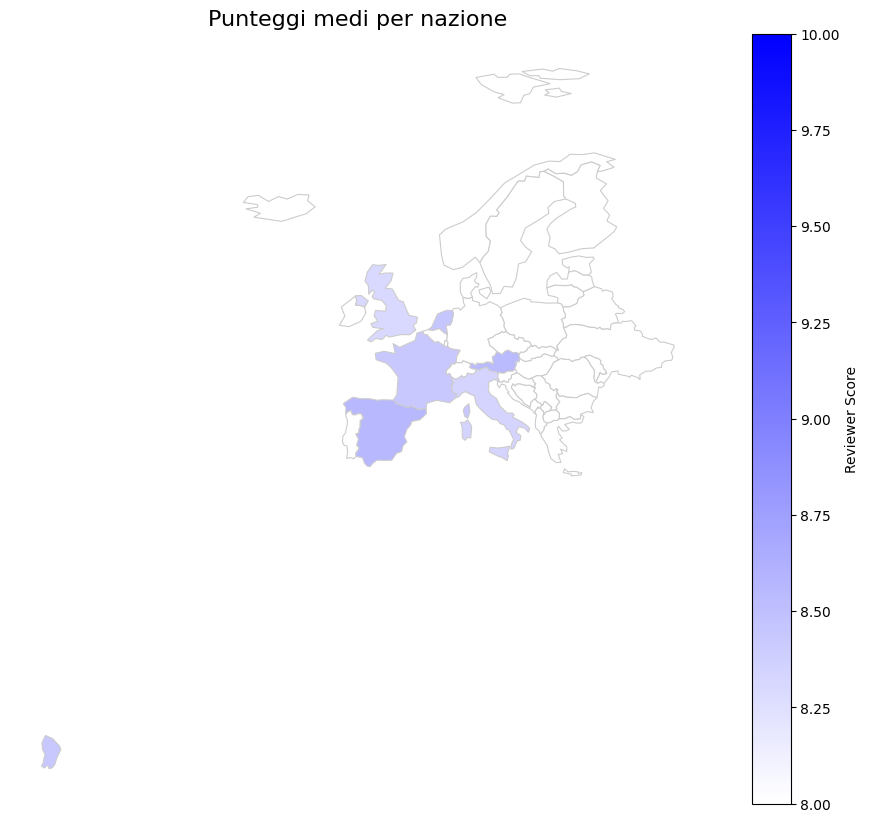

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Data loading
file_path = 'data_geomap_total.xlsx'
df = pd.read_excel(file_path, engine='openpyxl')
df = df.groupby('City_Nation', as_index=False).mean()
df['City_Nation'] = df['City_Nation'].str.split(', ').str[1]
df.rename(columns={'City_Nation': 'NAME'}, inplace=True)

# Load a GeoDataFrame of European countries
world = gpd.read_file('map\\ne_110m_admin_0_countries.shp')
europe = world[(world['CONTINENT'] == "Europe") & (world['NAME'] != "Russia")]

# Merge the GeoDataFrame with the DataFrame
# Fill missing scores with 0 for countries not in the dataframe
europe = europe.merge(df, on='NAME', how='left')
europe = europe.fillna(0)

# Create a custom colormap from white to blue
custom_cmap = LinearSegmentedColormap.from_list("white_to_blue", ["white", "blue"])

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
europe.plot(column='Reviewer_Score', cmap=custom_cmap, linewidth=0.8, ax=ax, edgecolor='0.8', vmin=8, vmax=10)

# Customize the plot
ax.set_title('Punteggi medi per nazione', fontsize=16)
ax.set_axis_off()
plt.colorbar(ax.collections[0], ax=ax, orientation="vertical", label="Reviewer Score")

# Show plot
plt.show()
